In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print("setup complete")

setup complete


## Goal
Visualize and make calculations from medical examination data.  
The dataset values were collected during medical examinations.
## Our Data
The rows represent Patients.   
Columns represent information from the medical examination.  
- dats is stored in medical_examination.csv


In [80]:
df = pd.read_csv("medical_examination.csv", index_col="id")
df.head()

,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [81]:
df.shape

(70000, 12)

1. age in days
2. sex {1,2,3}
3. height in cm
4. weight in kg
5. ap_hi is systolic blood pressure
6. ap_lo is diastolic blood pressure
7. cholesterol {1,2,3} => 1: normal, 2: above normal, 3: well above normal
8. gluc {1,2,3} => 1: normal, 2: above normal, 3: well above normal
9. smoke {0,1}
10. alco {0,1}
11. active | physically active {0,1}
12. cardio (disease) {0,1}

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   sex          70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.9 MB


## Task 1: Create an overweight column
To determine if a person is overweight we need to calculate their BMI first.  
- weight in kg/ square of height in meters.
- BMI > 25 then the person is overweight.  


In [83]:
q1 = df.weight
q2 = (df.height/100) ** 2

# df["bmi"] = q1/q2
# df.head()

In [84]:
# df.bmi>25

### converting bool to int
- using the astype() method we can convert True or False to 1 and 0


In [85]:
df["overweight"] = (q1/q2>25).astype(int)
df.head()

,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0


In [86]:
df.dtypes

age              int64
sex              int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
overweight       int32
dtype: object

## Task 2: Normalizing cholesterol and gluc
ordinarily, both gluc and cholesterol have values {1,2,3} where 1 is normal, 2 is above normal and 3 is well above normal.  

Normalize both columns by having 0 when value is 1 and 1 when value is 2 or 3

In [87]:
df.gluc.value_counts()

gluc
1    59479
3     5331
2     5190
Name: count, dtype: int64

In [88]:
df["gluc"] = (df.gluc>1).astype(int)
df.gluc.value_counts()

gluc
0    59479
1    10521
Name: count, dtype: int64

In [89]:
df.cholesterol.value_counts()

cholesterol
1    52385
2     9549
3     8066
Name: count, dtype: int64

In [90]:
df.cholesterol = (df.cholesterol>1).astype(int)

In [91]:
# df["cholesterol"] = cholesterol.astype(int)
df.cholesterol.value_counts()
df.head()

,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0


## Task 3: Convert data from wide to long and plot a cat plot
- converting the data using pd.melt(), and splitting by cardio.


In [92]:
df_cat = pd.melt(df, id_vars=["cardio"], value_vars=["cholesterol", "gluc", "smoke", "alco", "active", "overweight"])
df_cat

,cardio,variable,value
0,0,cholesterol,0
1,1,cholesterol,1
2,1,cholesterol,1
3,1,cholesterol,0
4,0,cholesterol,0
...,...,...,...
419995,0,overweight,1
419996,1,overweight,1
419997,1,overweight,1
419998,1,overweight,1


- grouping by cardio

In [93]:
df_cat = df_cat.groupby(["cardio","variable","value"]).size().reset_index()
df_cat.rename(columns={0:"total"}, inplace=True)

In [94]:
df_cat

,cardio,variable,value,total
0,0,active,0,6378
1,0,active,1,28643
2,0,alco,0,33080
3,0,alco,1,1941
4,0,cholesterol,0,29330
5,0,cholesterol,1,5691
6,0,gluc,0,30894
7,0,gluc,1,4127
8,0,overweight,0,15915
9,0,overweight,1,19106


- plotting the cat plot

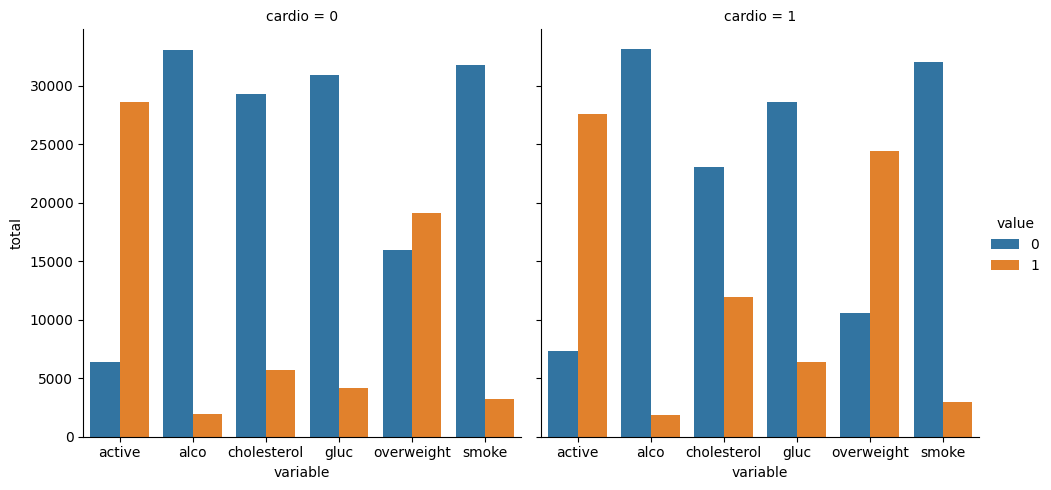

In [95]:
fig = sns.catplot(data=df_cat, kind="bar", x="variable", y="total", hue="value", col="cardio")

In [96]:
fig.savefig('catplot.png')

## task 5: Cleaning data and making a heatmap
- removing patients where diastolic pressure is higher than systolic
- removing patients where height is less than the 2.5th percentitle
- removing patients where height is more than the 97.5th percentitle
- removing patients where weight is less than the 2.5th percentitle
- removing patients where weight is more than the 97.5th percentitle



In [97]:
df_heat = df.loc[(df["ap_lo"] <= df["ap_hi"]) &
            (df.height >= df.height.quantile(0.025)) & 
            (df.height <= df.height.quantile(0.975)) & 
            (df.weight >= df.weight.quantile(0.025)) & 
            (df.weight <= df.weight.quantile(0.975))]
df_heat.reset_index(inplace=True)

- creating a corr matrix and storing it in corr.

In [98]:
corr = df_heat.corr()

In [99]:
mask = np.triu(np.ones_like(corr,dtype=bool))
mask

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False, False, False,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False, False, False, False,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False, False, False, False, False,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False, False, False, False, False, False,  True,
         

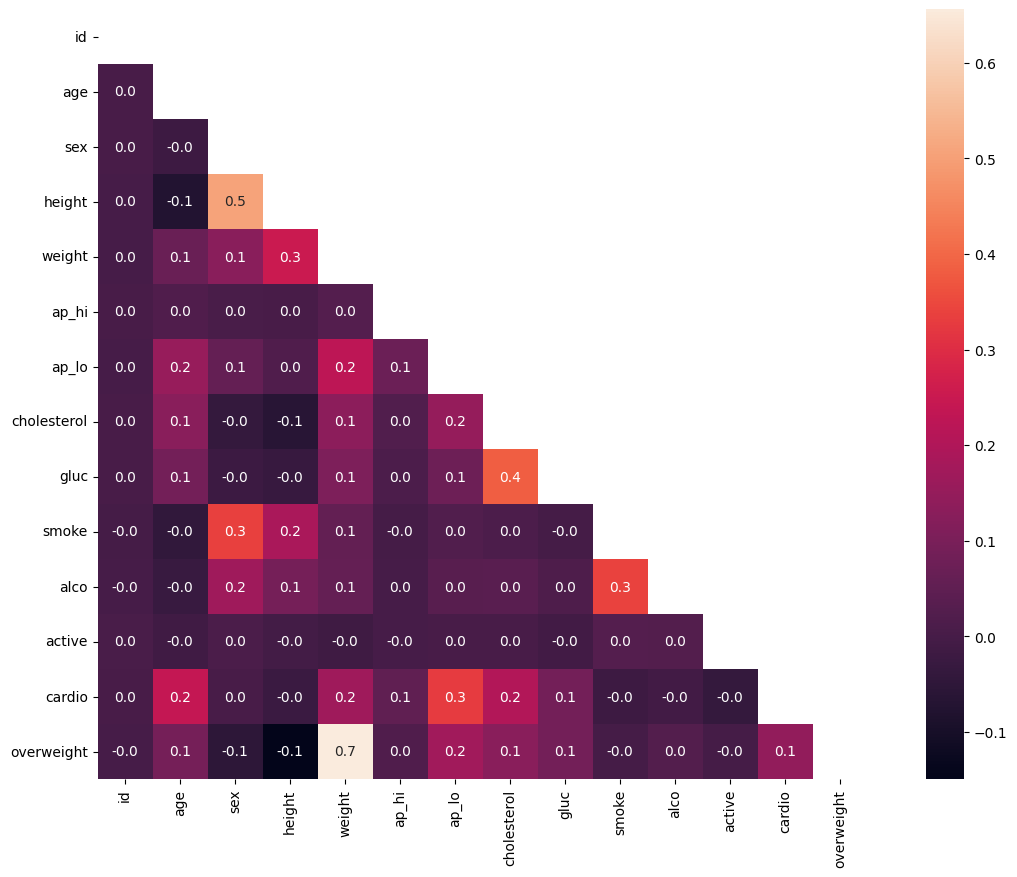

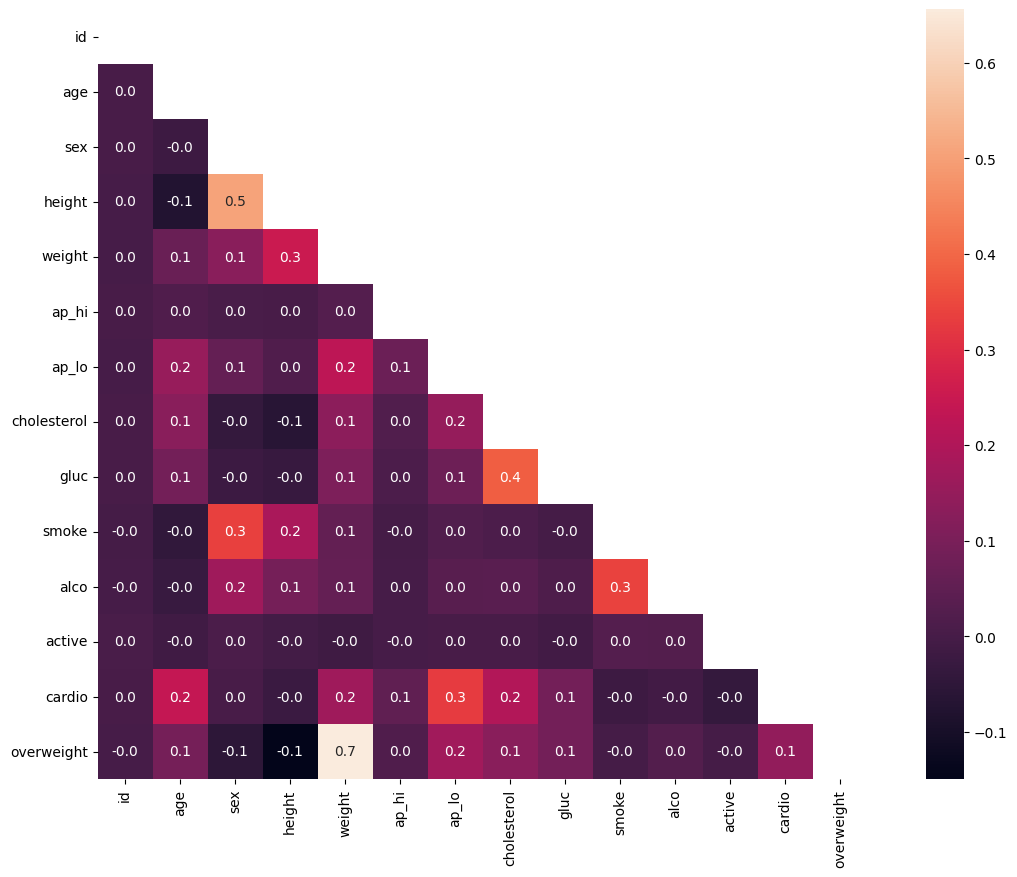

In [111]:
fig = plt.figure(figsize=(15,10))
sns.heatmap(data=corr, mask=mask, annot=True, square=True, fmt="0.1f")

fig